# Prediction Using Supervised Learning 

### Predict the percentage of an student based on the no. of study hours.

In [1]:
#import all the required libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
#load the dataset to pandas dataframe
URL = "http://bit.ly/w-data"
student_data = pd.read_csv(URL)

print("Data with", student_data.shape[0]," rows and ",student_data.shape[1]," cols")
student_data.head()

Data with 25  rows and  2  cols


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


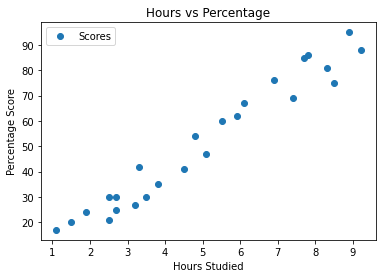

In [3]:
#data visualization


# Plotting the distribution of scores
student_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()


From the graph above, we can clearly see that there is a positive linear relationship between the number of hours studied and percentage of score.

In [4]:
#Prepare data 

X = student_data.copy()
y = student_data['Scores']
del X['Scores']

X.shape , y.shape 

((25, 1), (25,))

In [5]:
X_train , X_test ,y_train  , y_test = train_test_split(X,y,test_size=0.2,random_state=1)
print("Train data shape : ",X_train.shape , y_train.shape )
print("Test data shape : ",X_test.shape , y_test.shape )

Train data shape :  (20, 1) (20,)
Test data shape :  (5, 1) (5,)


In [6]:
lineareg = LinearRegression()
lineareg.fit(X_train,y_train)

LinearRegression()

In [7]:
lineareg.coef_ , lineareg.intercept_

(array([10.46110829]), -1.5369573315500702)

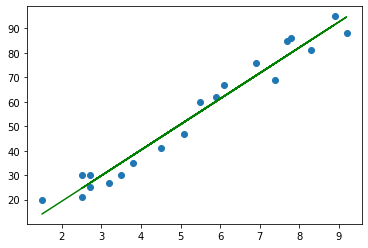

In [14]:
line = lineareg.coef_ * X_train + lineareg.intercept_

plt.scatter(X_train,y_train)
plt.plot(X_train,line,'g')
plt.show()

In [9]:
ypred = lineareg.predict(X_test)
ypred

array([ 9.97026179, 32.98470004, 18.33914843, 87.38246316, 48.67636248])

In [10]:
pd.DataFrame({'Actual':y_test,'Predicted':ypred})

,Actual,Predicted
14,17,9.970262
13,42,32.984700
17,24,18.339148
3,75,87.382463
21,54,48.676362


In [11]:
print('Mean Absolute Error:',mean_absolute_error(y_test, ypred)) 

Mean Absolute Error: 7.882398086270432


In [12]:
# testing with unkown data
hours = np.array(9.25)
y_pred = lineareg.predict(hours.reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(y_pred))

No of Hours = 9.25
Predicted Score = [95.22829438]
